In [1]:
#Stock Market (S&P 500) Sigma (standard deviation) Analysis
#created by John Broberg on 2022-05-29

#source: https://www.nasdaq.com/market-activity/index/spx/historical

#cd
#cd Desktop/StockMarketSigma
#git pull https://github.com/JohnBroberg/StockMarketSigma.git


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = 'HistoricalData_1654527891763.csv'
df = pd.read_csv(data)

df


,Date,Close/Last,Volume,Open,High,Low
0,06/03/2022,4108.54,--,4137.57,4142.67,4098.67
1,06/02/2022,4176.82,--,4095.41,4177.51,4074.37
2,06/01/2022,4101.23,--,4149.78,4166.54,4073.85
3,05/31/2022,4132.15,--,4151.09,4168.34,4104.88
4,05/27/2022,4158.24,--,4077.43,4158.49,4077.43
...,...,...,...,...,...,...
2544,06/12/2012,1324.18,--,1309.40,1324.31,1306.62
2545,06/11/2012,1308.93,--,1325.72,1335.52,1307.73
2546,06/08/2012,1325.66,--,1314.99,1325.81,1307.77
2547,06/07/2012,1314.99,--,1316.15,1329.05,1312.68


In [2]:
df.describe()

,Close/Last,Open,High,Low
count,2549.000000,2549.000000,2549.000000,2549.000000
mean,2588.565249,2565.022244,2578.159447,2550.695940
std,873.932306,917.135490,922.812952,910.564924
min,1308.930000,0.000000,0.000000,0.000000
25%,1970.890000,1962.920000,1971.440000,1952.260000
50%,2390.900000,2392.370000,2398.160000,2380.940000
75%,2978.760000,2980.330000,2993.280000,2965.660000
max,4796.560000,4804.510000,4818.620000,4780.040000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2549 entries, 0 to 2548
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2549 non-null   object 
 1   Close/Last  2549 non-null   float64
 2   Volume      2549 non-null   object 
 3   Open        2549 non-null   float64
 4   High        2549 non-null   float64
 5   Low         2549 non-null   float64
dtypes: float64(4), object(2)
memory usage: 119.6+ KB


In [4]:
df.shape

(2549, 6)

In [5]:
df.isnull().any()

Date          False
Close/Last    False
Volume        False
Open          False
High          False
Low           False
dtype: bool

<function matplotlib.pyplot.show(close=None, block=None)>

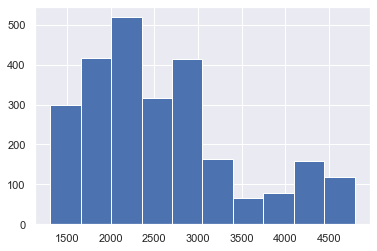

In [6]:
sns.set()

plt.hist(df['Close/Last'])
plt.show

In [7]:
close_current = df['Close/Last'].iloc[0]
close_current

4108.54

In [8]:
close_mean = df['Close/Last'].mean()
close_mean

2588.5652491173105

In [9]:
close_sd = df['Close/Last'].std()
close_sd

873.9323055797928

In [10]:
sigma1 = close_mean + close_sd
sigma1

3462.497554697103

In [11]:
sigma2 = close_mean + (2 * close_sd)
sigma2

4336.429860276896

In [12]:
sigma3 = close_mean + (3 * close_sd)
sigma3

5210.362165856689

Text(0.5, 1.0, 'Density: S&P 500 Daily Close/Last - 06/06/2012 to 06/03/2022')

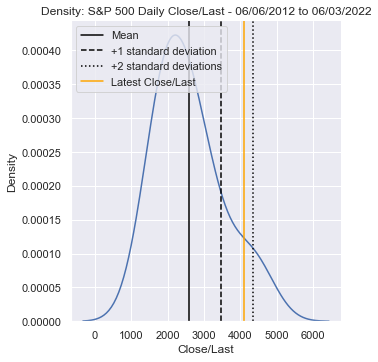

In [17]:
# Using Kernal Density Estimation (kde) to approximate probability density function
# https://seaborn.pydata.org/tutorial/distributions.html#kernel-density-estimation
#bw_adjust: adjust bandwidth to smoothe out modalities

sns.displot(df['Close/Last'], kind='kde', bw_adjust=3.0) 

if close_current > sigma2:
    c = 'red'
elif close_current > sigma1:
    c = 'orange'
else: 
    c = 'green'

plt.axvline(close_mean, color='black', label='Mean')
plt.axvline(sigma1, color='black', linestyle='--', label='+1 standard deviation')
plt.axvline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.axvline(close_current, color=c, label='Latest Close/Last')
plt.legend(loc='upper left')
plt.title('Density: S&P 500 Daily Close/Last - 06/06/2012 to 06/03/2022')

In [14]:
z_score = (close_current - close_mean)/close_sd
z_score

1.7392362556894985

In [15]:
cols = ['Date','Close/Last']
df1 = df.loc[:,cols]
df1['Date'] = pd.to_datetime(df1['Date'], format = "%m/%d/%Y" )
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2549 entries, 0 to 2548
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2549 non-null   datetime64[ns]
 1   Close/Last  2549 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 40.0 KB


Text(0.5, 1.0, 'S&P 500 Daily Close/Last - 06/06/2012 to 06/03/2022')

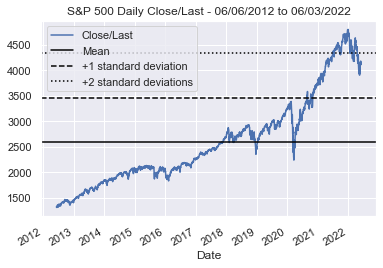

In [18]:
df1.plot(x='Date', y='Close/Last')
plt.axhline(close_mean, color='black', label='Mean')
plt.axhline(sigma1, color='black', linestyle='--', label='+1 standard deviation')
plt.axhline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.legend()
plt.title('S&P 500 Daily Close/Last - 06/06/2012 to 06/03/2022')
